# Calcolo del diametro della condotta
---

In [1]:
import os
os.getcwd()

'C:\\Users\\anzo5\\Desktop\\fognatura\\conduits'

In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Si definisce il grado di riempimento della condotta, funzione dell'angolo $\theta$. Il valore ottimale è $G(\theta) \in \left[0.7, 0.8\right]$, $\theta \in [0, 2\pi]$

In [3]:
def G(theta):
    return 0.5*(1-math.cos(theta/2))

def theta(G):
    return 2*math.acos(1-2*G)


Si plotta quindi la variazione del grado di riempimento al variare di $\theta$

[]

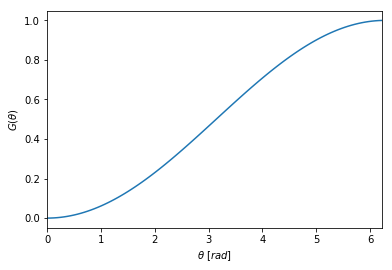

In [4]:
import numpy as np
%matplotlib inline
import matplotlib as plt

x = np.arange(0,2*math.pi,2*math.pi/100)

import pandas as pd



gg=pd.Series(list(map(G,x)),index=x)
ax=gg.plot()
ax.set_ylabel(r"$G(\theta)$")
ax.set_xlabel(r"$\theta\,\,[rad]$")
ax.plot()

The estimation of $\theta$ vs $G$

[]

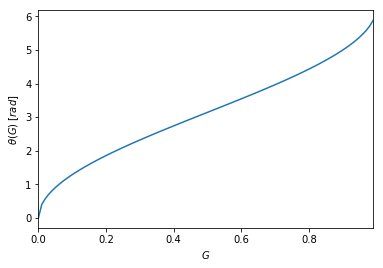

In [5]:
y=np.arange(0,1,0.01)
gl=pd.Series(list(map(theta,y)),index=y)
ax=gl.plot()
ax.set_xlabel(r"$G$")
ax.set_ylabel(r"$\theta(G)\,\,[rad]$")
ax.plot()

Si definiscono **area bagnata** e __perimetro bagnato__ come funzione di $\theta$ e del diametro $D$

[]

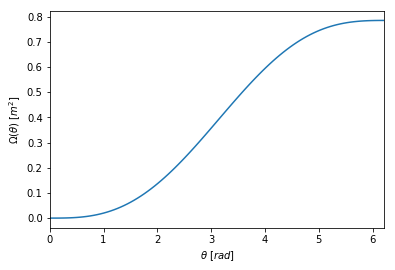

In [6]:
#Area Bagnata
def Omega(theta,D):
    return 0.125*D**2*(theta-math.sin(theta))

x = np.arange(0,2*math.pi,2*math.pi/100)
oo=pd.Series(map(Omega,x,[1]*100),index=x)
ax=oo.plot()
ax.set_ylabel(r"$\Omega(\theta)\,\,[m^2]$")
ax.set_xlabel(r"$\theta\,\,[rad]$")
ax.plot()

[]

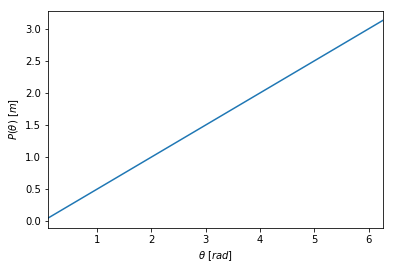

In [7]:
#Perimetro Bagnato
def P(theta,D):
    return theta*D/2

x = np.arange(0.1,2*math.pi,2*math.pi/100)
oo=pd.Series(list(map(P,x,[1]*100)),index=x)
ax=oo.plot()
ax.set_ylabel(r"$P(\theta)\,\,[m]$")
ax.set_xlabel(r"$\theta\,\,[rad]$")
ax.plot()

Nonché il **raggio idraulico**

[]

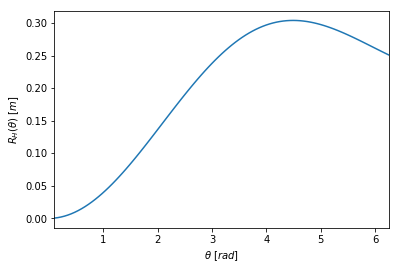

In [8]:
#Raggio Idraulico
def Rh(theta,D):
    return (D/4)*(1-math.sin(theta)/theta)

x = np.arange(0.1,2*math.pi,2*math.pi/100)
aa=pd.Series(list(map(Rh,x,[1]*100)),index=x)
ay=aa.plot()
ay.set_ylabel(r"$R_H(\theta)\,\,[m]$")
ay.set_xlabel(r"$\theta\,\,[rad]$")
ay.plot()

In [9]:
# The function that does it
#q is the discharge
#k is the Gauckler-Strickler coefficient
#i is the slope imposed to the pipe
#G is the degree of filling
def D(q,k,i,G):
    fac= 20.158736798317967
    num = fac*q/k/math.sqrt(i)
    theta = 2*math.acos(1-2*G)
    den = (1 - math.sin(theta)/theta)*(theta-math.sin(theta))
    return 10**(-9/8)*(num/den)**(3/8.)

In [46]:
Qmax_c = 211.837;
ic = 0.035638
D(Qmax_c,1/.011, ic
,0.75)

0.30127782912443857

Ipotizzando di variare solo il diametro e di mantenere fissi gli altri parametri si può definire la seguente funzione

In [47]:
def dD(x):
    return D(x,1/.011,ic,0.75)

da cui

In [48]:
Dc = dD(Qmax_c)
Dc

0.30127782912443857

In [49]:
Dcom_c = .344

Per calcolare il grado di riempimento $G$ basta invertire la formula di *Gauckler - Strickler*. Si trova così la seguente eguaglianza 
$$ (1-\frac{\sin \theta}{\theta})^{2/3}(\theta-\sin \theta) = 2^{13/3} \left(\frac{b}{D}\right)^{8/3}\frac{Q_{max}}{i_f^{1/2} k_s}$$

Definendo i termini a primo e secondo membro rispettivamente

[]

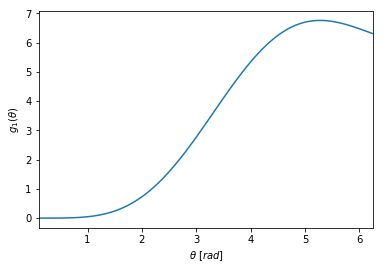

In [50]:
#Primo membro
def g_1(theta):
    return (1-math.sin(theta)/theta)**(2/3)*(theta -math.sin(theta))

#Variazione del primo membro al variare di theta

ts=np.arange(0.1,2*math.pi,2*math.pi/100)
ax=pd.Series(list(map(g_1,ts)),index=ts).plot()
ax.set_ylabel(r"$g_1(\theta)$")
ax.set_xlabel(r"$\theta\,\,[rad]$")
ax.plot()

In [51]:
#Secondo membro
def g_2(D,q,i,k):
    fac=20.158736798317967
    b=10**(-9/8)
    return fac*((b/D)**(8/3))*q/(math.sqrt(i)*k)

Plottando i due membri si può visualizzare la loro intersezione

[]

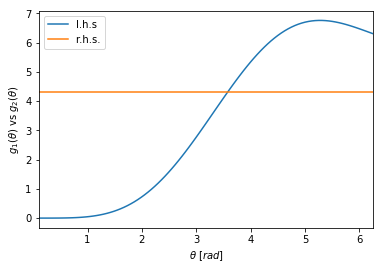

In [52]:
ts=np.arange(0.1,2*math.pi,2*math.pi/100)
gg=pd.DataFrame(list(map(g_1,ts)),index=ts,columns=["l.h.s"])
gg["r.h.s."]=g_2(Dcom_c,Qmax_c,ic,90)
ax=gg.plot()
ax.set_ylabel(r"$g_1(\theta)$ vs $g_2(\theta)$")
ax.set_xlabel(r"$\theta\,\,[rad]$")
ax.plot()

In [53]:
mask = (np.abs(gg['l.h.s'] - gg['r.h.s.'])<.2)
mask[3:4]

3.053097    False
3.115929    False
3.178761    False
3.241593    False
3.304425    False
3.367256    False
3.430088    False
3.492920    False
3.555752     True
3.618584     True
3.681416    False
3.744247    False
3.807079    False
3.869911    False
3.932743    False
3.995575    False
dtype: bool

In [54]:
gg[mask]

,l.h.s,r.h.s.
3.555752,4.251448,4.326235
3.618584,4.415687,4.326235


In [55]:
Gc = G(3.618584);Gc

0.6181205741377093

In [56]:
theta_c = theta(Gc);
print('rad:', theta_c, '\ndeg:', theta_c/math.pi*180)

rad: 3.618584 
deg: 207.32959101356747


In [57]:
Rh_c = Rh(theta_c, Dcom_c); Rh_c

0.0969112638818128

In [58]:
gamma = 9810;
def tau(gamma, i, Rh):
    return gamma * i * Rh

tau_c = tau(gamma, ic, Rh_c); tau_c

33.88102873397864

In [59]:
def i(gamma, Rh):
    return 2/(gamma*Rh)

imin_c = i(gamma, Rh_c); 
print(imin_c, '\t', round(imin_c, 6))

0.0021037141628618456 	 0.002104


In [60]:
tau(gamma, round(imin_c, 6), Rh_c)

2.0002717452239476

In [61]:
if tau_c > 2:
    check = 'Verificato!'
else:
    check = "Non verificato!"
        

conduit = pd.DataFrame([
    'c12',
    Qmax_c,
    ic,
    Dcom_c,
    Gc,
    theta_c/math.pi*180,
    Rh_c,
    tau_c,
    check
],
index = ('Condotta', 'Portata [l/s]', 'Pendenza', 'Diametro', 'G', 'theta', 'Rh', 'tau', 'Criterio di autopulizia (tau>2 Pa)')).T
conduit = conduit.set_index('Condotta'); conduit

,Portata [l/s],Pendenza,Diametro,G,theta,Rh,tau,Criterio di autopulizia (tau>2 Pa)
Condotta,,,,,,,,
c12,211.837,0.035638,0.344,0.618121,207.33,0.0969113,33.881,Verificato!


In [62]:
os.chdir(r'csv')
os.getcwd()

FileNotFoundError: [WinError 2] Impossibile trovare il file specificato: 'csv'

In [63]:
conduit.to_csv('c12.csv')

---